<a href="https://colab.research.google.com/github/supriyabaghel46/learning/blob/main/ml13toy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('/content/placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [4]:
df = df.iloc[:, 1:]

In [5]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [7]:
import matplotlib.pyplot as plt


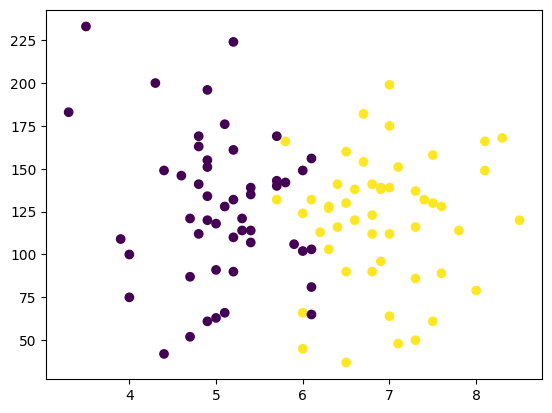

In [9]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [16]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [17]:
y.shape

(100,)

In [18]:
X.shape

(100, 2)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.1)


In [22]:
X_test

,cgpa,iq
80,4.9,196.0
19,5.2,132.0
33,6.0,149.0
70,6.3,127.0
43,6.8,141.0
85,5.8,166.0
36,5.7,140.0
90,7.3,86.0
75,4.8,169.0
51,4.8,141.0


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [28]:
 X_train = scaler.fit_transform(X_train)

In [29]:
X_test = scaler.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [30]:
X_test

array([[  4.9, 196. ],
       [  5.2, 132. ],
       [  6. , 149. ],
       [  6.3, 127. ],
       [  6.8, 141. ],
       [  5.8, 166. ],
       [  5.7, 140. ],
       [  7.3,  86. ],
       [  4.8, 169. ],
       [  4.8, 141. ]])

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
clf = LogisticRegression()

In [37]:
#model training
clf.fit(X_train, y_train)

LogisticRegression()

In [41]:
y_pred=clf.predict(X_test)

In [40]:
y_test

,placement
80,0
19,0
33,0
70,1
43,1
85,1
36,0
90,1
75,0
51,0


In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test, y_pred)

0.5

In [44]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

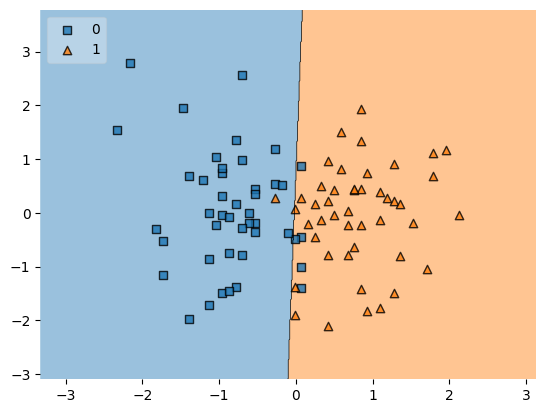

In [45]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [46]:
import pickle

In [47]:
pickle.dump(clf,open('model.pkl','wb'))